**Question 1**

In [1]:
from __future__ import (absolute_import, division)
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
al0 = 5e5
al1 = 2e5
N = 20 # number of iterations to check convergence. global so can be set
inits = np.array([[al0], [al1]])
nth_res = np.zeros((2,1))
p_ij = np.array([[1/6, 5/6],[1/3, 2/3]])
all_res = [inits]

Using $P[X_{n+1} = 0] = p_{0,0}P[X_n = 0] + p_{1,0}P[X_n = 1]$:

In [3]:
p_t = np.transpose(p_ij)
for n in range(N):
    all_res.append(np.dot(matrix_power(p_t, n+1),
                                      inits).round())
    if (all_res[n]-all_res[n-1])[0][0] == 0:
        print('Reached optimal point, no longer converges. Exiting at iter ', n)
        break

Reached optimal point, no longer converges. Exiting at iter  9


In [4]:
# vectorized extraction of airline outputs
al_0_out = [k[0][0] for k in all_res]
al_1_out = [k[1][0] for k in all_res]

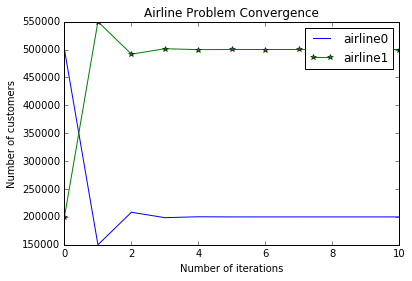

In [5]:
plt.plot(al_0_out, label='airline0')
plt.plot(al_1_out, '-*', label='airline1')
plt.title('Airline Problem Convergence')
plt.ylabel('Number of customers')
plt.xlabel('Number of iterations')
plt.legend()
plt.show()

It takes about 9 steps for the steady state passenger numbers to occur using the breakpoint logic shown in the script above. Since the passenger count cannot be floats, I round the total number of customers. If this was a financial security or volatility, I would clearly not be able to do this as the values of these would be floats. As also shown by the printout below, the final steady state number is 200k passengers for airline 0 and 500k passengers for airline 1.

In [6]:
print(np.array(all_res))

[[[ 500000.]
  [ 200000.]]

 [[ 150000.]
  [ 550000.]]

 [[ 208333.]
  [ 491667.]]

 [[ 198611.]
  [ 501389.]]

 [[ 200231.]
  [ 499769.]]

 [[ 199961.]
  [ 500039.]]

 [[ 200006.]
  [ 499994.]]

 [[ 199999.]
  [ 500001.]]

 [[ 200000.]
  [ 500000.]]

 [[ 200000.]
  [ 500000.]]

 [[ 200000.]
  [ 500000.]]]
